<a href="https://colab.research.google.com/github/sandhya842/week1-AI-/blob/main/2501608_sandhya_chaudhary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1
Basic Data Exploration & Trend Visualization
3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)
Objective:*italicized text*

Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Load the dataset
df = pd.read_csv(
    "/content/drive/MyDrive/AI/Human_Development_Index_Dataset.csv",
    encoding="ISO-8859-1"
)

# Verify it loaded correctly
#df.head()


In [63]:
# Display all unique years in the dataset
unique_years = df['year'].unique()
print("unique yrs: ",unique_years)
# Filter observations from the year 2022
hdi_2022_df = df[df['year'] == 2022]
# Check the shape and preview the data
print(hdi_2022_df.shape)
hdi_2022_df.head()




unique yrs:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]
(206, 30)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


2. Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.

In [64]:
# Display first 10 rows of the 2022 dataset
print("first 10 rows:",hdi_2022_df.head(10))
# Get number of rows and columns
rows, columns = hdi_2022_df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
# Display column names and data types
hdi_2022_df.dtypes


first 10 rows:      Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [65]:
# Check missing values per column
missing_counts = hdi_2022_df.isnull().sum()
#
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41

In [66]:
# Identify object (text) columns
hdi_2022_df.select_dtypes(include='object').columns
for col in hdi_2022_df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(hdi_2022_df[col].unique()[:10])


iso3:
['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT']

country:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']


In [67]:
#  inconsistent or mispelled countries name
pd.set_option('display.max_rows', None)
print(hdi_2022_df['country'].value_counts())


country
Afghanistan                            1
Albania                                1
Algeria                                1
Andorra                                1
Angola                                 1
Antigua and Barbuda                    1
Argentina                              1
Armenia                                1
Australia                              1
Austria                                1
Azerbaijan                             1
Bahamas                                1
Bahrain                                1
Bangladesh                             1
Barbados                               1
Belarus                                1
Belgium                                1
Belize                                 1
Benin                                  1
Bhutan                                 1
Bolivia (Plurinational State of)       1
Bosnia and Herzegovina                 1
Botswana                               1
Brazil                                 1
Brunei D

In [68]:
# checking for duplicate rows

duplicate_rows = hdi_2022_df.duplicated().sum()
print("Number of duplicate rows:")
print(duplicate_rows)


Number of duplicate rows:
0


In [69]:
# checking if special characters exists as missing data
special_chars = ['-', '–', '—', 'NA', 'N/A', 'n/a', '', ' ']

for col in hdi_2022_df.columns:
    cleaned_column = hdi_2022_df[col].astype(str).str.strip()
    count = cleaned_column.isin(special_chars).sum() + hdi_2022_df[col].isna().sum()
    print(f"{col}: {count}")

Unnamed: 0: 0
iso3: 0
country: 0
year: 0
hdi: 2
life_expectancy: 0
pop_millions: 0
hdi_f: 13
hdi_m: 13
life_expec_f: 0
life_expec_m: 0
expec_yr_school: 1
expec_yr_school_f: 1
expec_yr_school_m: 1
mean_yr_school: 2
mean_yr_school_f: 2
mean_yr_school_m: 2
gross_inc_percap: 2
gross_inc_percap_f: 13
gross_inc_percap_m: 13
gender_development: 13
gender_inequality: 29
secondary_education_f_%: 17
secondary_education_m_%: 17
seats_in_parliament_f_%: 2
seats_in_parliament_m_%: 2
labour_participation_f_%: 12
labour_participation_m_%: 12
co2_emission_tons: 2
mat_footprint_percap_tons: 41


In [70]:
# checking if NaN values exists
print("Missing (NaN) values per column:")
print(hdi_2022_df.isna().sum())


Missing (NaN) values per column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: 

In [71]:
# handling missing values
hdi_2022_df = hdi_2022_df.dropna()
print("After dropping:")
print(hdi_2022_df.isnull().sum())

After dropping:
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [72]:
# Filter for the year 2022
hdi_2022 = df[df['year'] == 2022]

# Compute mean, median, standard deviation
mean_hdi = hdi_2022['hdi'].mean()
median_hdi = hdi_2022['hdi'].median()
std_hdi = hdi_2022['hdi'].std()

# Identify highest and lowest HDI countries
highest_hdi = hdi_2022.loc[hdi_2022['hdi'].idxmax()]
lowest_hdi = hdi_2022.loc[hdi_2022['hdi'].idxmin()]

# Print results
print(f"Mean HDI (2022): {mean_hdi:.3f}")
print(f"Median HDI (2022): {median_hdi:.3f}")
print(f"Standard Deviation (2022): {std_hdi:.3f}")
print(f"Country with Highest HDI: {highest_hdi['country']} ({highest_hdi['hdi']})")
print(f"Country with Lowest HDI: {lowest_hdi['country']} ({lowest_hdi['hdi']})")


Mean HDI (2022): 0.723
Median HDI (2022): 0.740
Standard Deviation (2022): 0.153
Country with Highest HDI: Switzerland (0.967)
Country with Lowest HDI: Somalia (0.38)


5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [73]:
# Filter for the year 2022
hdi_2022 = df[df['year'] == 2022]

# Filter countries with HDI > 0.800
high_hdi = hdi_2022[hdi_2022['hdi'] > 0.800]

# Sort by Gross National Income per Capita in descending order
high_hdi_sorted = high_hdi.sort_values(by='gross_inc_percap', ascending=False)

# Display top 10 countries
top_10 = high_hdi_sorted.head(10)
print(top_10[['country', 'hdi', 'gross_inc_percap']])

                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800

After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [74]:
hdi_2022_df = df[df['year'] == 2022].copy()

# Define function to classify HDI
def hdi_category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif 0.550 <= hdi <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi <= 0.799:
        return 'High'
    else:  # HDI >= 0.800
        return 'Very High'

# Create new column 'HDI Category'
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)

# Verify classification counts
print(hdi_2022_df['HDI Category'].value_counts())

# Ensure the new column is included
print(hdi_2022_df.head())

# Save the updated dataframe to CSV
hdi_2022_df.to_csv("/content/drive/MyDrive/AI/HDI_category_added.csv", index=False)

HDI Category
Very High    73
High         54
Medium       44
Low          35
Name: count, dtype: int64
     Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
32           33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
65           66  ALB      Albania  2022  0.789           76.833      2.842321   
98           99  DZA      Algeria  2022  0.745           77.129     44.903225   
131         132  AND      Andorra  2022  0.884           83.552      0.079824   
164         165  AGO       Angola  2022  0.591           61.929     35.588987   

        hdi_f     hdi_m  life_expec_f  ...  gender_inequality  \
32   0.332443  0.534145        66.213  ...              0.665   
65   0.780277  0.798432        79.472  ...              0.116   
98   0.681844  0.773800        78.457  ...              0.460   
131       NaN       NaN        85.838  ...                NaN   
164  0.560890  0.619680        64.541  ...              0.520   

     secondary_educ

3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.
Tasks:
Complete all the Following Tasks:
1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [75]:
# Filter for years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Verify the filtered data
print(hdi_2020_2022_df['year'].value_counts())  # Check counts per year
print(hdi_2020_2022_df.head())

# Save the filtered dataset for further analysis
hdi_2020_2022_df.to_csv("/content/drive/MyDrive/AI/HDI_problem1B.csv", index=False)

year
2020    206
2021    206
2022    206
Name: count, dtype: int64
    Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30          31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31          32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32          33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63          64  ALB      Albania  2020  0.784           76.989      2.866849   
64          65  ALB      Albania  2021  0.785           76.463      2.854710   

       hdi_f     hdi_m  life_expec_f  ...  gender_development  \
30  0.381373  0.548741        65.432  ...               0.695   
31  0.379129  0.528559        65.279  ...               0.717   
32  0.332443  0.534145        66.213  ...               0.622   
63  0.775404  0.793220        79.676  ...               0.978   
64  0.777866  0.792942        79.173  ...               0.981   

    gender_inequality  secondary_education_f_%  secondary_edu

2. Data Cleaning:
• Check for missing values in the following essential columns:
– hdi
– country
– year
• Identify and address the following issues:
– missing or null values,
– inconsistent or misspelled country names,
– duplicate rows,
– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
– handling missing values (dropping or imputing),
– converting data types appropriately,
– removing duplicate entries,
– ensuring consistent naming conventions for countries and years.
• All cleaning decisions must be clearly justified in the final report.

In [76]:


# Load dataset
hdi_problem1B_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_problem1B.csv")

# 1️ Check for missing values in essential columns
print("Missing values in essential columns:")
print(hdi_problem1B_df[['country', 'year', 'hdi']].isnull().sum())

# 2 checking for missing or null values for datset
missing_values = hdi_problem1B_df.isnull().sum()
print(missing_values)

# 3 checking inconsistent or misspelled country names
pd.set_option('display.max_rows', None)
print("missepelled country: ")
print(hdi_2022_df['country'].value_counts())

# 4 Remove duplicate rows
dublicate_rows = hdi_problem1B_df.drop_duplicates()
print("Number of duplicate rows:")
print(duplicate_rows)

#5 checking numeric columns stored as text
numeric_col_check = hdi_problem1B_df.select_dtypes(include="object").columns
print(" columns stored as text:")
print(numeric_col_check)

# 6 checking if columns contains non-numeric symbol
special_chars = ['-', '–', '—', 'NA', 'n/a', 'N/A', ' ']
for col in hdi_problem1B_df.columns:
  count = (hdi_problem1B_df[col].isin(special_chars)).sum()
  if count > 0:
    print(f"special character found in column '{col}': {count}")

else:
  print("No special character found")


# 7 dropping the columns having missing values
print("Rows before dropping:", len(hdi_problem1B_df))
hdi_problem1B_df_drop = hdi_problem1B_df.dropna()
print("Rows after dropping:", len(hdi_problem1B_df_drop))





Missing values in essential columns:
country    0
year       0
hdi        8
dtype: int64
Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            8
life_expectancy                0
pop_millions                   0
hdi_f                         41
hdi_m                         41
life_expec_f                   0
life_expec_m                   0
expec_yr_school                5
expec_yr_school_f              5
expec_yr_school_m              5
mean_yr_school                 8
mean_yr_school_f               8
mean_yr_school_m               8
gross_inc_percap               6
gross_inc_percap_f            39
gross_inc_percap_m            39
gender_development            41
gender_inequality             89
secondary_education_f_%       53
secondary_education_m_%       53
seats_in_parliament_f_%        6
seats_in_parliament_m_%        6
labour_participation_f_%      36
labour_participation

3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

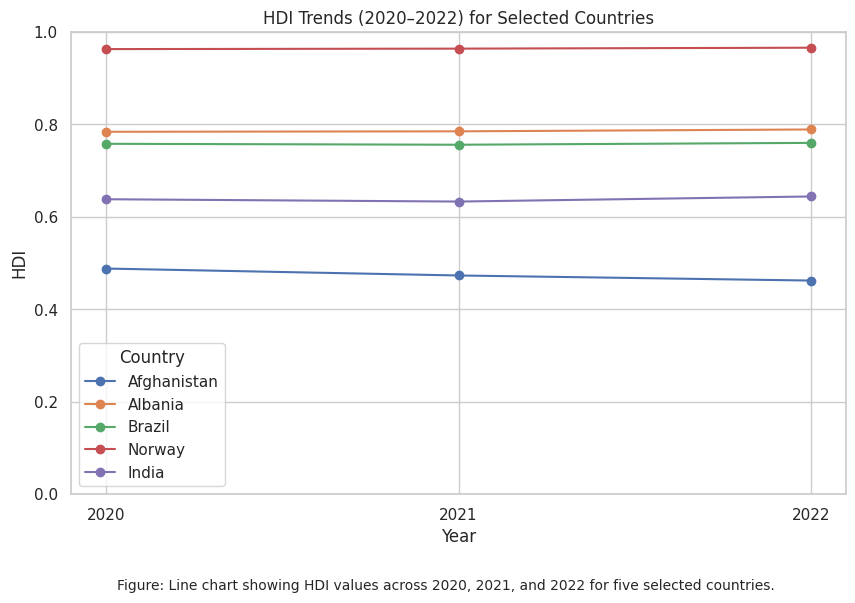

In [77]:


# Load the cleaned dataset for 2020-2022
hdi_problem1B_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_problem1B.csv")

# Select five countries (you can change these)
countries = ['Afghanistan', 'Albania', 'Brazil', 'Norway', 'India']
hdi_subset = hdi_problem1B_df[hdi_problem1B_df['country'].isin(countries)]

# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Plot HDI trends
for country in countries:
    country_data = hdi_subset[hdi_subset['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

# Labels, title, legend
plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('HDI Trends (2020–2022) for Selected Countries')
plt.xticks([2020, 2021, 2022])
plt.ylim(0,1)
plt.legend(title='Country')
plt.grid(True)

# Caption (displayed as text)
plt.figtext(0.5, -0.05, "Figure: Line chart showing HDI values across 2020, 2021, and 2022 for five selected countries.",
            wrap=True, horizontalalignment='center', fontsize=10)

# Show plot
plt.show()


• B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.
– Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.
– Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."

• Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.

In [78]:
# Bar chart for mean HDI by region(2020-2022)
region_map = {

    # East Asia & Pacific
    "Australia": "East Asia & Pacific",
    "Brunei Darussalam": "East Asia & Pacific",
    "Cambodia": "East Asia & Pacific",
    "China": "East Asia & Pacific",
    "Fiji": "East Asia & Pacific",
    "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific",
    "Korea (Republic Of)": "East Asia & Pacific",
    "Lao People'S Democratic Republic": "East Asia & Pacific",
    "Malaysia": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Micronesia, Fed. Sts.": "East Asia & Pacific",
    "Mongolia": "East Asia & Pacific",
    "Myanmar": "East Asia & Pacific",
    "Nauru": "East Asia & Pacific",
    "New Zealand": "East Asia & Pacific",
    "Palau": "East Asia & Pacific",
    "Papua New Guinea": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific",
    "Samoa": "East Asia & Pacific",
    "Singapore": "East Asia & Pacific",
    "Solomon Islands": "East Asia & Pacific",
    "Thailand": "East Asia & Pacific",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Tuvalu": "East Asia & Pacific",
    "Vanuatu": "East Asia & Pacific",
    "Viet Nam": "East Asia & Pacific",

    # Europe & Central Asia
    "Albania": "Europe & Central Asia",
    "Armenia": "Europe & Central Asia",
    "Austria": "Europe & Central Asia",
    "Azerbaijan": "Europe & Central Asia",
    "Belarus": "Europe & Central Asia",
    "Belgium": "Europe & Central Asia",
    "Bosnia And Herzegovina": "Europe & Central Asia",
    "Bulgaria": "Europe & Central Asia",
    "Croatia": "Europe & Central Asia",
    "Cyprus": "Europe & Central Asia",
    "Czechia": "Europe & Central Asia",
    "Denmark": "Europe & Central Asia",
     "Estonia": "Europe & Central Asia",
    "Finland": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia",
    "Germany": "Europe & Central Asia",
    "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia",
    "Iceland": "Europe & Central Asia",
    "Ireland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia",
    "Kyrgyzstan": "Europe & Central Asia",
    "Latvia": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Luxembourg": "Europe & Central Asia",
    "Malta": "Europe & Central Asia",
    "Moldova (Republic Of)": "Europe & Central Asia",
    "Netherlands": "Europe & Central Asia",
    "North Macedonia": "Europe & Central Asia",
    "Norway": "Europe & Central Asia",
    "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia",
    "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia",
    "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia",
    "Spain": "Europe & Central Asia",
    "Sweden": "Europe & Central Asia",
    "Switzerland": "Europe & Central Asia",
    "Türkiye": "Europe & Central Asia",
    "Tajikistan": "Europe & Central Asia",
     "Estonia": "Europe & Central Asia",
    "Finland": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia",
    "Germany": "Europe & Central Asia",
    "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia",
    "Iceland": "Europe & Central Asia",
    "Ireland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia",
    "Kyrgyzstan": "Europe & Central Asia",
    "Latvia": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Luxembourg": "Europe & Central Asia",
    "Malta": "Europe & Central Asia",
    "Moldova (Republic Of)": "Europe & Central Asia",
    "Netherlands": "Europe & Central Asia",
    "North Macedonia": "Europe & Central Asia",
    "Norway": "Europe & Central Asia",
    "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia",
    "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia",
    "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia",
    "Spain": "Europe & Central Asia",
    "Sweden": "Europe & Central Asia",
    "Switzerland": "Europe & Central Asia",
    "Türkiye": "Europe & Central Asia",
    "Tajikistan": "Europe & Central Asia",
    "Ukraine": "Europe & Central Asia",
    "United Kingdom": "Europe & Central Asia",
    "Uzbekistan": "Europe & Central Asia",

    # Latin America & Caribbean
    "Argentina": "Latin America & Caribbean",
    "Bahamas": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean",
    "Belize": "Latin America & Caribbean",
    "Bolivia (Plurinational State Of)": "Latin America & Caribbean",
    "Brazil": "Latin America & Caribbean",
    "Chile": "Latin America & Caribbean",
    "Colombia": "Latin America & Caribbean",
    "Costa Rica": "Latin America & Caribbean",
    "Cuba": "Latin America & Caribbean",
    "Dominican Republic": "Latin America & Caribbean",
    "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Guyana": "Latin America & Caribbean",
    "Haiti": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",
    "Jamaica": "Latin America & Caribbean",
    "Mexico": "Latin America & Caribbean",
    "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean",
    "Paraguay": "Latin America & Caribbean",
    "Peru": "Latin America & Caribbean",
    "Suriname": "Latin America & Caribbean",
    "Trinidad and Tobago": "Latin America & Caribbean",
    "Uruguay": "Latin America & Caribbean",
    "Venezuela (Bolivarian Republic Of)": "Latin America & Caribbean",

    # Middle East & North Africa
    "Algeria": "Middle East & North Africa",
    "Bahrain": "Middle East & North Africa",
    "Egypt": "Middle East & North Africa",
    "Iran (Islamic Republic Of)": "Middle East & North Africa",
    "Iraq": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Libya": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Oman": "Middle East & North Africa",
    "Qatar": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa",
    "Tunisia": "Middle East & North Africa",
    "United Arab Emirates": "Middle East & North Africa",
    "Yemen": "Middle East & North Africa",

    # North America
    "Canada": "North America",
    "United States": "North America",

    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa",
    "Benin": "Sub-Saharan Africa",
    "Botswana": "Sub-Saharan Africa",
    "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa",
    "Cameroon": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Congo (Democratic Republic Of The)": "Sub-Saharan Africa",
    "Congo": "Sub-Saharan Africa",
    "Côte d’Ivoire": "Sub-Saharan Africa",
    "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa",
    "Gambia": "Sub-Saharan Africa",
    "Ghana": "Sub-Saharan Africa",
    "Guinea": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa",
    "Liberia": "Sub-Saharan Africa",
    "Madagascar": "Sub-Saharan Africa",
    "Malawi": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Namibia": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Rwanda": "Sub-Saharan Africa",
    "Senegal": "Sub-Saharan Africa",
    "Slovakia":"Sub-Saharan Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Sudan": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Tanzania (United Republic Of)": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Tanzania": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa",
    "Zambia": "Sub-Saharan Africa",
    "Zimbabwe": "Sub-Saharan Africa"
}
hdi_problem1B_df['Region'] = hdi_problem1B_df['country'].map(region_map)


# Check the first few rows
hdi_problem1B_df.head()






,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region
0,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
1,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
2,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
3,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704,Europe & Central Asia
4,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865,Europe & Central Asia


Countries without a region mapping:

['Andorra' 'Antigua and Barbuda' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Cabo Verde' 'Comoros' 'Congo (Democratic Republic of the)' "Côte d'Ivoire" 'Djibouti' 'Dominica' 'Equatorial Guinea' 'Eritrea' 'Eswatini (Kingdom of)' 'Grenada' 'Guinea-Bissau' 'Hong Kong, China (SAR)' 'Iran (Islamic Republic of)' "Korea (Democratic People's Rep. of)" 'Korea (Republic of)' "Lao People's Democratic Republic" 'Lesotho' 'Liechtenstein' 'Mauritius' 'Micronesia (Federated States of)' 'Moldova (Republic of)' 'Monaco' 'Montenegro' 'Palestine, State of' 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and the Grenadines' 'San Marino' 'Sao Tome and Principe' 'Seychelles' 'Syrian Arab Republic' 'Tanzania (United Republic of)' 'Turkmenistan' 'Venezuela (Bolivarian Republic of)']

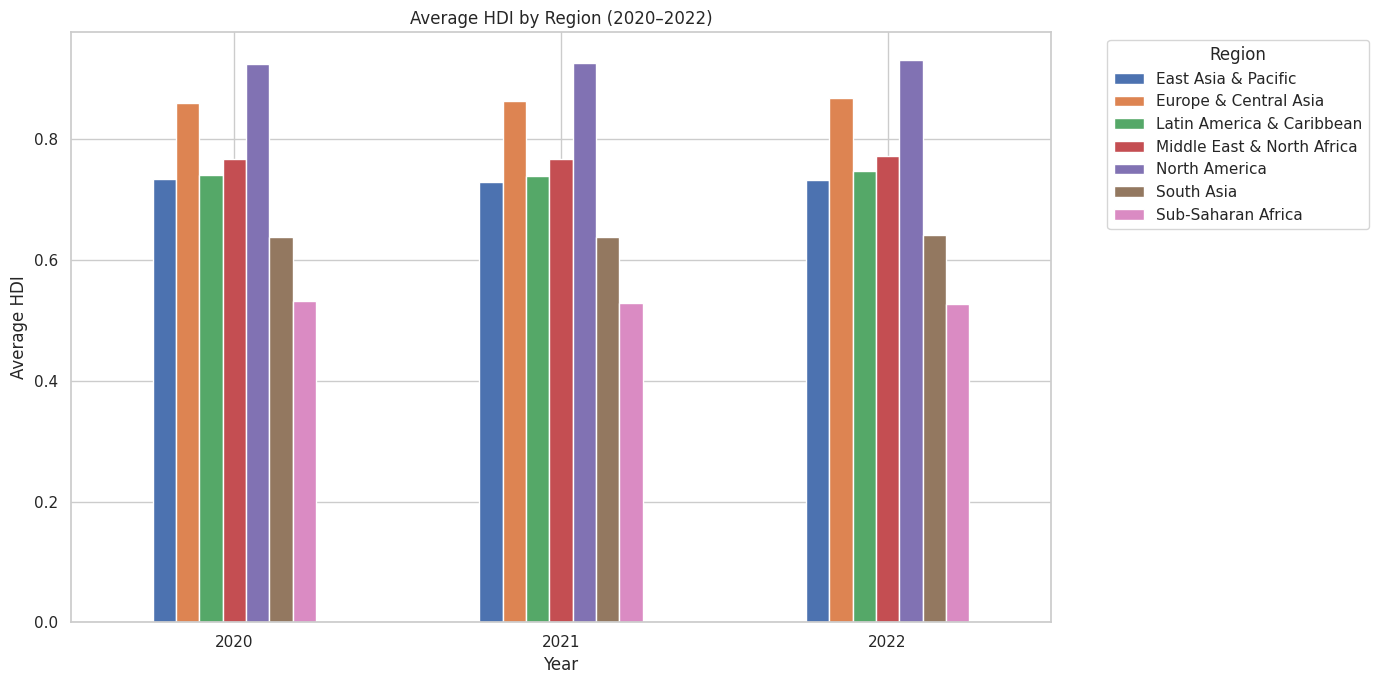

In [79]:
# Bar chart
import matplotlib.pyplot as plt
import pandas as pd

# Group by Year and Region, calculate mean HDI
avg_region_year = hdi_problem1B_df.groupby(['year', 'Region'])['hdi'].mean().unstack()

# Plot grouped bar chart
avg_region_year.plot(kind='bar', figsize=(14,7))
plt.ylabel("Average HDI")
plt.xlabel("Year")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=0)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Box Plot: HDI Distribution for 2020, 2021, and 2022 ∗ Filter the dataset for the years 2020, 2021, and 2022. ∗ Create a box plot showing HDI spread for each of the three years. ∗ Include titles and axis labels. ∗ Comment briefly on distribution differences.

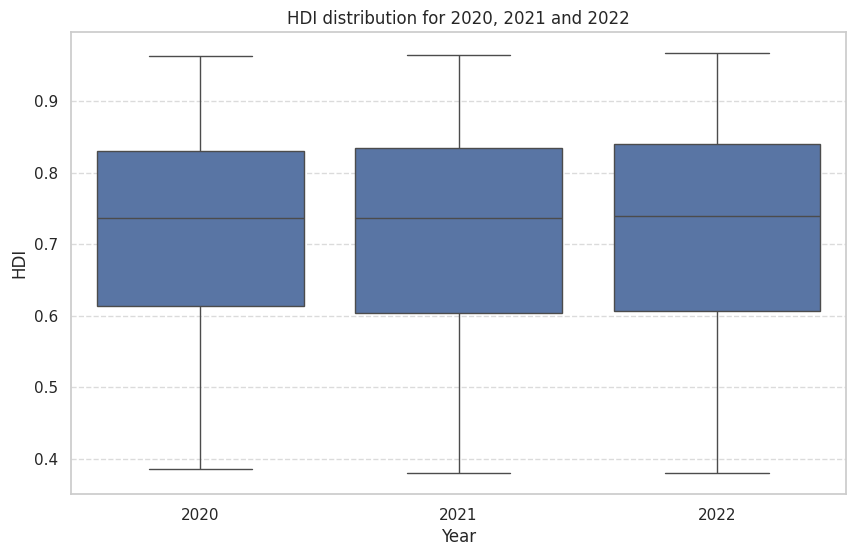

In [80]:
# Box plot
import matplotlib.pyplot as plt
import seaborn as sns
# plotting box plot

plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="hdi", data=hdi_problem1B_df)

plt.title("HDI distribution for 2020, 2021 and 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Scatter Plot: HDI vs. GNI per Capita ∗ Check if the dataset contains a column for GNI per Capita. ∗ If available: · Create a scatter plot using HDI as the dependent variable. · Use GNI per Capita on the x-axis. · Add a regression line (optional). ∗ If the variable is missing, write: "GNI per Capita variable not available in the dataset."

GNI per capita variable is available


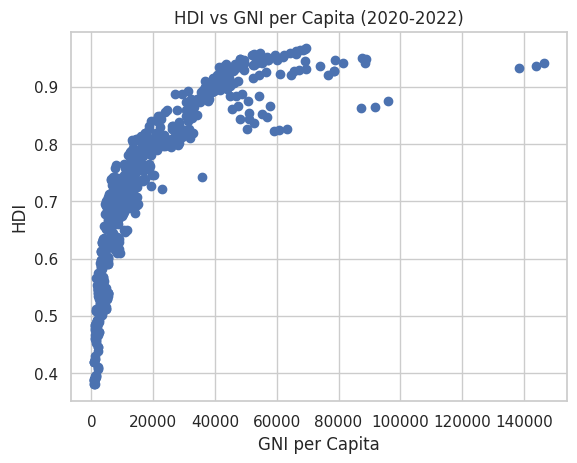

In [81]:
if "gross_inc_percap" in hdi_problem1B_df.columns:
  print("GNI per capita variable is available")
else:
  print("GNI per Capita variable not available in the dataset")

#GNI per capita variable is available

# scatter plot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(hdi_problem1B_df["gross_inc_percap"], hdi_problem1B_df["hdi"])

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (2020-2022)")
plt.show()

4. Short Analysis Questions:
• Which countries show the greatest improvement in HDI from 2020 to 2022?
• Did any countries experience a decline in HDI? Provide possible reasons.
• Which region has the highest and lowest average HDI across these three years?
• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

In [82]:
# Load dataset
hdi_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_problem1B.csv")

# checking for the countries showing greates improvement in HDI

hdi_improvement = hdi_problem1B_df.pivot(index='country', columns='year', values='hdi')


hdi_improvement['HDI_Change'] = hdi_improvement[2022] - hdi_improvement[2020]


greatest_improvement = hdi_improvement['HDI_Change'].sort_values(ascending=False)
print(greatest_improvement.head(5))

# Analysing decline in HDI
hdi_decline = hdi_improvement[hdi_improvement['HDI_Change'] < 0]
print(hdi_decline)

# Analysing highest and lowest average HDI in regions
# Analysing highest and lowest average HDI by country
avg_hdi_country = hdi_problem1B_df.groupby("country")["hdi"].mean()

print("Average HDI by country:")
print(avg_hdi_country)

print("Highest HDI country:", avg_hdi_country.idxmax(), avg_hdi_country.max())
print("Lowest HDI country:", avg_hdi_country.idxmin(), avg_hdi_country.min())



country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: HDI_Change, dtype: float64
year                               2020   2021   2022  HDI_Change
country                                                          
Afghanistan                       0.488  0.473  0.462      -0.026
Angola                            0.594  0.590  0.591      -0.003
Australia                         0.948  0.949  0.946      -0.002
Belize                            0.705  0.698  0.700      -0.005
Brunei Darussalam                 0.827  0.824  0.823      -0.004
Bulgaria                          0.802  0.796  0.799      -0.003
Burkina Faso                      0.446  0.445  0.438      -0.008
Central African Republic          0.389  0.387  0.387      -0.002
Chad                              0.396  0.393  0.394      -0.002
Comoros                           0.588  0.585  0.586      -0.002
Congo                             0.598  0.598  0.593      -0.005
C

From the analysis, there is significant differences in human development between regions. This may be due to differences in education access, health facilities, income and other factors.

The COVID_19 pandemic had a significant negative impact on HDI growth as it reduced life expectancy, disrupted education and economic growth.

The analysis reveals substantial disparities in human development across different regions. These differences can largely be attributed to unequal access to quality education, variations in healthcare infrastructure, income inequality, and differing levels of economic and social development.Furthermore, the COVID-19 pandemic had a pronounced negative impact on Human Development Index (HDI) growth worldwide. The pandemic led to a decline in life expectancy due to increased mortality

Problem 2
Advanced HDI Exploration
Objective:

Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detec-
tion, metric relationships, and gap analysis.

Tasks:
Complete all the following tasks:
1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [83]:
# Loading dataset
df = pd.read_csv(
    "/content/drive/MyDrive/AI/Human_Development_Index_Dataset.csv",
    encoding="ISO-8859-1")

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

hdi_SouthAsian_df = df.loc[df["country"].isin(south_asian_countries)].copy()
#saving filtered dataset to new csv file
hdi_SouthAsian_df.to_csv("/content/drive/MyDrive/AI/HDI_SouthAsia.csv", index=False)


2. Composite Development Score:
• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

Top 5 South Asian Countries by Composite Score(1990s) :
country
Maldives     3024.723773
Sri Lanka    1472.435534
Pakistan      965.657045
Bhutan        909.574292
India         636.883028
Name: Composite_Score, dtype: float64


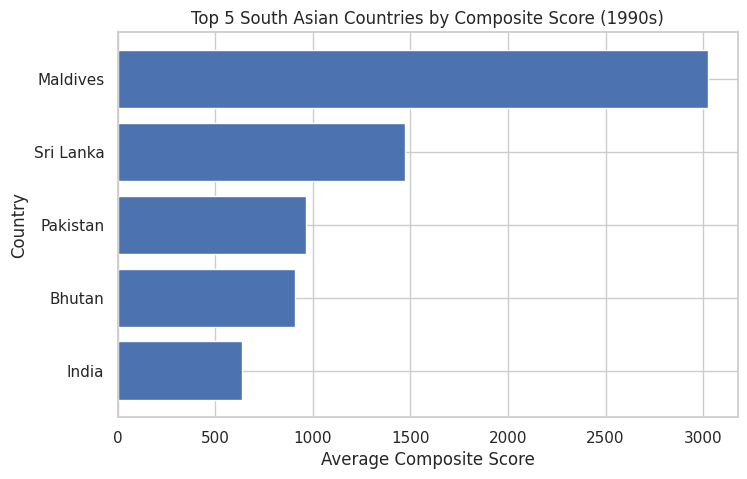

Top 5 South Asian Countries by Composite Score(2000s) :
country
Maldives     4273.809348
Sri Lanka    2137.544010
Bhutan       1626.280127
Pakistan     1112.312573
India         965.673484
Name: Composite_Score, dtype: float64


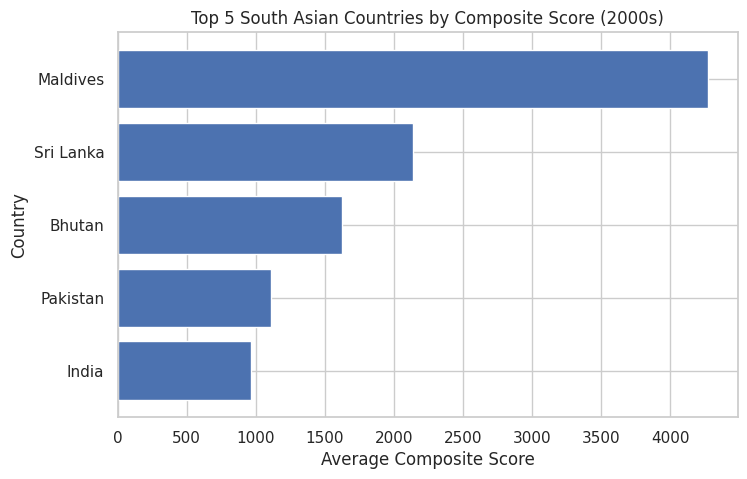

Top 5 South Asian Countries by Composite Score(2010s) :
country
Maldives      4962.203432
Sri Lanka     3518.317313
Bhutan        2733.270564
India         1602.444237
Bangladesh    1391.573452
Name: Composite_Score, dtype: float64


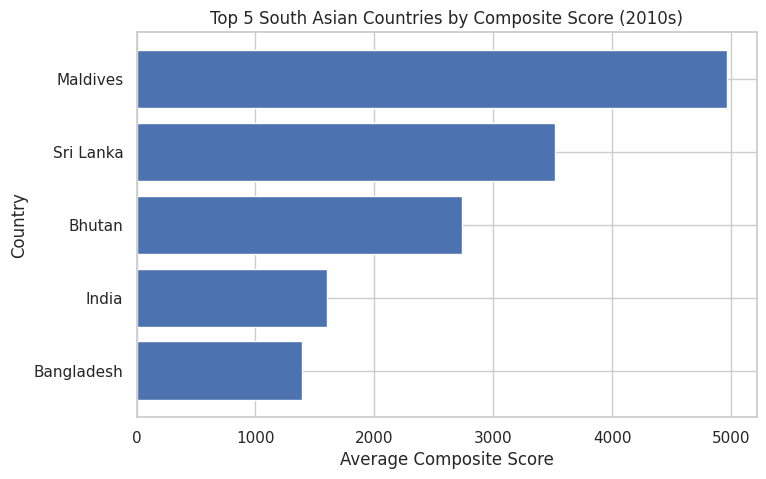

Top 5 South Asian Countries by Composite Score(2020s) :
country
Maldives      4827.657597
Sri Lanka     3767.752918
Bhutan        3097.787317
India         1978.776712
Bangladesh    1877.251264
Name: Composite_Score, dtype: float64


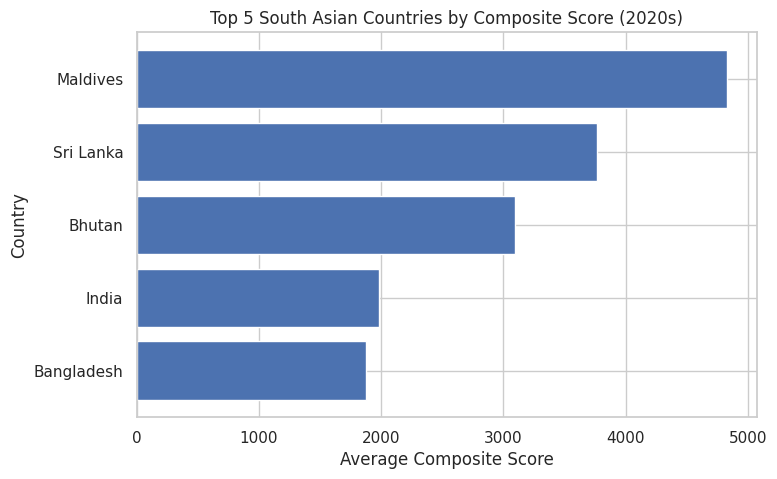

In [84]:
import matplotlib.pyplot as plt
# assigning function to group countries by decade
def decade_group(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    elif 2020 <= year <= 2022:
        return "2020s"
    else:
        return "Other"

hdi_SouthAsian_df["Decade"] = hdi_SouthAsian_df["year"].apply(decade_group)

# calculating Composite Development Score

hdi_SouthAsian_df["Composite_Score"] = (
    0.30 * hdi_SouthAsian_df["life_expectancy"] +
    0.30 * hdi_SouthAsian_df["gross_inc_percap"]
)

# Ranking countries according to decade
decades = hdi_SouthAsian_df["Decade"].unique()
for decade in decades:
    decade_df = hdi_SouthAsian_df[hdi_SouthAsian_df["Decade"] == decade]
    # Compute average Composite Score across years in the decade
    avg_score = decade_df.groupby("country")["Composite_Score"].mean().sort_values(ascending=False)

    print(f"Top 5 South Asian Countries by Composite Score({decade}) :")
    print(avg_score.head(5))

# Plotting top 5 countries in each decade:
    top5_countries = avg_score.head(5)
    plt.figure(figsize=(8,5))
    plt.barh(top5_countries.index, top5_countries.values)
    plt.xlabel("Average Composite Score")
    plt.ylabel("Country")
    plt.title(f"Top 5 South Asian Countries by Composite Score ({decade})")
    plt.gca().invert_yaxis()
    plt.show()



Comparing the Leaders to the Rest of South AsiaTo put this into perspective, here is how the "Composite Score" (typically HDI) usually breaks down across the region:CountryIncome TierPrimary StrengthMaldivesUpper-MiddleTourism revenue & specialized island healthcare.Sri LankaLower-MiddleUniversal education and public health systems.BhutanLower-MiddleEnvironmental protection and "Gross National Happiness."IndiaLower-MiddleRapidly growing economy but high internal inequality.BangladeshLower-MiddleMassive improvements in microfinance and female education.

3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
• Discuss why the identified countries stand out as outliers.

HDI Outliers:
Empty DataFrame
Columns: [country, year, hdi]
Index: []

GNI per Capita Outliers:
Empty DataFrame
Columns: [country, year, hdi, gross_inc_percap]
Index: []


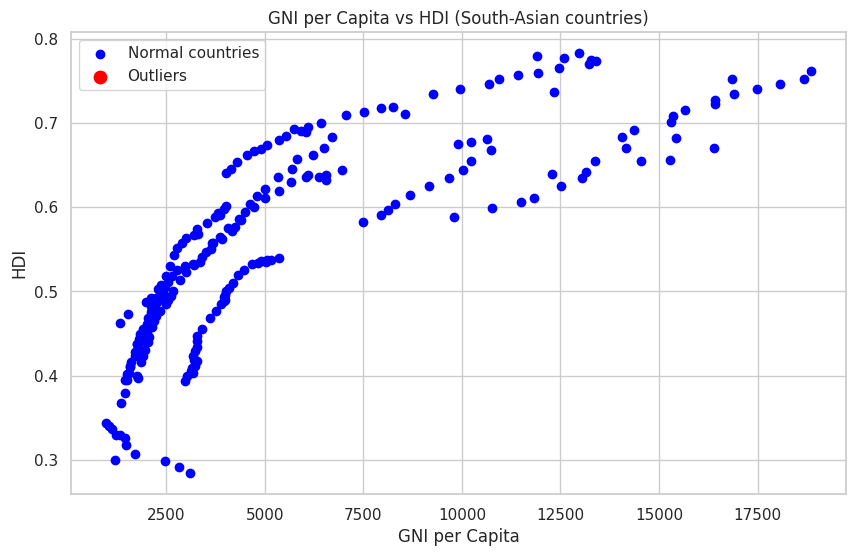

In [85]:


# Load South Asia dataset
hdi_south_asia_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_SouthAsia.csv")

# Ensure numeric columns
hdi_south_asia_df['hdi'] = pd.to_numeric(hdi_south_asia_df['hdi'], errors='coerce')
hdi_south_asia_df['gross_inc_percap'] = pd.to_numeric(hdi_south_asia_df['gross_inc_percap'], errors='coerce')

# Drop rows with missing values
hdi_south_asia = hdi_south_asia_df.dropna(subset=['hdi','gross_inc_percap'])

#
# 1️ Outlier detection using 1.5 * IQR rule
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Detect HDI outliers
hdi_outliers = detect_outliers_iqr(hdi_south_asia, 'hdi')

# Detect GNI per Capita outliers
gni_outliers = detect_outliers_iqr(hdi_south_asia, 'gross_inc_percap')

print("HDI Outliers:")
print(hdi_south_asia_df[hdi_south_asia_df["hdi"].isin(hdi_outliers)][['country','year','hdi']])

print("\nGNI per Capita Outliers:")
print(hdi_south_asia_df[hdi_south_asia_df["gross_inc_percap"].isin(gni_outliers)][['country','year','hdi','gross_inc_percap']])


# 2️ Scatter plot: GNI per Capita vs HDI with outliers highlighted

hdi_south_asia_df['HDI_outlier'] = hdi_south_asia_df['hdi'].isin(hdi_outliers)
hdi_south_asia_df['GNI_outlier'] = hdi_south_asia_df['gross_inc_percap'].isin(gni_outliers)
hdi_south_asia_df['Outlier'] = hdi_south_asia_df['HDI_outlier'] | hdi_south_asia_df['GNI_outlier']

non_outliers = hdi_south_asia_df[hdi_south_asia_df['Outlier'] == False]
outliers = hdi_south_asia_df[hdi_south_asia_df['Outlier'] == True]

plt.figure(figsize=(10,6))

# Non-outliers
plt.scatter(non_outliers["gross_inc_percap"], non_outliers["hdi"],
            color='blue', label='Normal countries')

# Outliers
plt.scatter(outliers["gross_inc_percap"], outliers["hdi"],
            color='red', label='Outliers', s=80)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI (South-Asian countries)")
plt.legend()
plt.grid(True)
plt.show()


In South Asia, the Maldives and Sri Lanka consistently emerge as development outliers because they represent two distinct models of regional success. The Maldives functions as a high-income service hub, maintaining the region's highest GNI per capita (projected at over $13,000 nominal for 2026) due to its globally renowned luxury tourism sector and relatively small population. This wealth has enabled the state to build a sophisticated healthcare system across its atolls, achieving a life expectancy of approximately 81.7 years, the highest in the region.



4. Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
• Compute Pearson correlation of each metric with HDI.
• Create scatter plots with trendlines to visualize the relationships.
• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

Pearson correlation of Life Expectancy with HDI: 0.949
Pearson correlation of Gender Development Index with HDI: 0.866


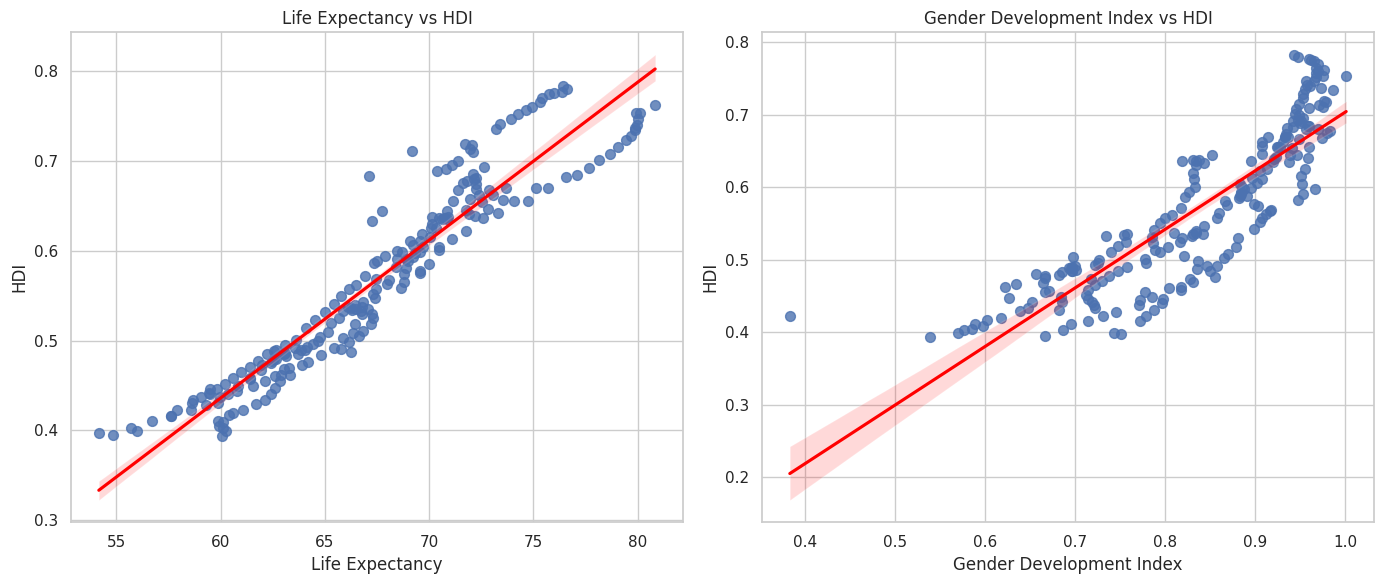

In [86]:


# Load South Asia dataset
hdi_south_asia_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_SouthAsia.csv")

# Ensure numeric columns
hdi_south_asia_df['hdi'] = pd.to_numeric(hdi_south_asia_df['hdi'], errors='coerce')
hdi_south_asia_df['life_expectancy'] = pd.to_numeric(hdi_south_asia_df['life_expectancy'], errors='coerce')
hdi_south_asia_df['gender_development'] = pd.to_numeric(hdi_south_asia_df['gender_development'], errors='coerce')

# Drop rows with missing values
hdi_south_asia_df = hdi_south_asia_df.dropna(subset=['hdi','life_expectancy','gender_development'])

#
# 1️ Compute Pearson correlations using Pandas
#
corr_life = hdi_south_asia_df['hdi'].corr(hdi_south_asia_df['life_expectancy'])
corr_gender = hdi_south_asia_df['hdi'].corr(hdi_south_asia_df['gender_development'])

print(f"Pearson correlation of Life Expectancy with HDI: {corr_life:.3f}")
print(f"Pearson correlation of Gender Development Index with HDI: {corr_gender:.3f}")

#
# 2️ Scatter plots with trendlines
#
plt.figure(figsize=(14,6))

# Life Expectancy vs HDI
plt.subplot(1,2,1)
sns.regplot(data=hdi_south_asia_df, x='life_expectancy', y='hdi', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Life Expectancy vs HDI')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')

# Gender Development Index vs HDI
plt.subplot(1,2,2)
sns.regplot(data=hdi_south_asia_df, x='gender_development', y='hdi', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Gender Development Index vs HDI')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')

plt.tight_layout()
plt.show()


Life expectancy shows a very strong positive relationship with HDI, with a correlation coefficient of 0.939, which is close to 1. This indicates that countries with higher life expectancy consistently tend to have higher HDI values. In comparison, the Gender Development Index (GDI) exhibits the weakest relationship with HDI, with a correlation of 0.874. Although still strong, this suggests that gender development contributes to HDI, but to a slightly lesser extent than life expectancy.

5. Gap Analysis:
• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

Top 3 Positive Gaps (GNI higher than HDI):
       country  gross_inc_percap    hdi  GNI_HDI_Gap
164   Maldives       18846.79219  0.762  18846.03019
263  Sri Lanka       11899.49847  0.780  11898.71847
98      Bhutan       10624.87388  0.681  10624.19288

Top 3 Negative Gaps (HDI higher than GNI):
         country  gross_inc_percap    hdi  GNI_HDI_Gap
32   Afghanistan       1335.205733  0.462  1334.743733
197        Nepal       4025.554685  0.601  4024.953685
230     Pakistan       5374.270423  0.540  5373.730423


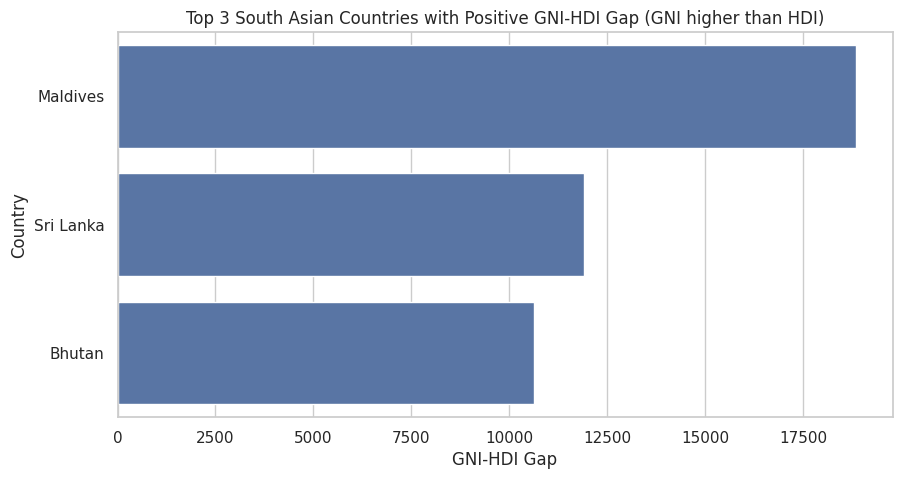

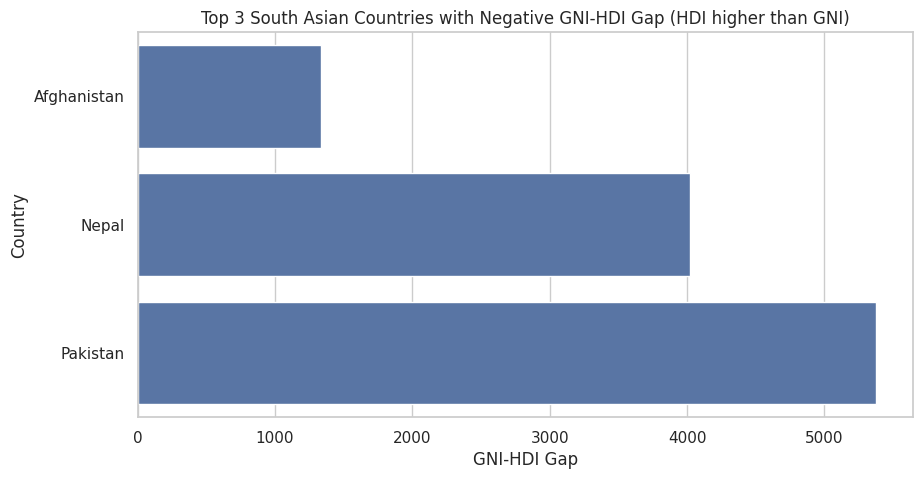

In [87]:

# Load South Asia dataset
hdi_south_asia = pd.read_csv("/content/drive/MyDrive/AI/HDI_SouthAsia.csv")

# Ensure numeric columns
hdi_south_asia['hdi'] = pd.to_numeric(hdi_south_asia['hdi'], errors='coerce')
hdi_south_asia['gross_inc_percap'] = pd.to_numeric(hdi_south_asia['gross_inc_percap'], errors='coerce')

# Drop rows with missing values
hdi_south_asia = hdi_south_asia.dropna(subset=['hdi','gross_inc_percap'])


# 1️ Compute GNI-HDI Gap
# GNI HDI Gap = GNI per Capita - HDI

hdi_south_asia['GNI_HDI_Gap'] = hdi_south_asia['gross_inc_percap'] - hdi_south_asia['hdi']

# Take latest year (2022) for ranking
latest_year = 2022
southasia_2022 = hdi_south_asia[hdi_south_asia['year'] == latest_year].copy()

#
# 2️ Rank countries by GNI HDI Gap
#
gap_desc = southasia_2022.sort_values(by='GNI_HDI_Gap', ascending=False)
gap_asc = southasia_2022.sort_values(by='GNI_HDI_Gap', ascending=True)

print("Top 3 Positive Gaps (GNI higher than HDI):")
print(gap_desc[['country','gross_inc_percap','hdi','GNI_HDI_Gap']].head(3))

print("\nTop 3 Negative Gaps (HDI higher than GNI):")
print(gap_asc[['country','gross_inc_percap','hdi','GNI_HDI_Gap']].head(3))


# 3️ Plot top 3 positive and top 3 negative gaps

top_pos = gap_desc.head(3)
top_neg = gap_asc.head(3)

# Top 3 Positive Gaps
plt.figure(figsize=(10,5))
sns.barplot(x='GNI_HDI_Gap', y='country', data=top_pos)  # removed palette
plt.title('Top 3 South Asian Countries with Positive GNI-HDI Gap (GNI higher than HDI)')
plt.xlabel('GNI-HDI Gap')
plt.ylabel('Country')
plt.show()

# Top 3 Negative Gaps
plt.figure(figsize=(10,5))
sns.barplot(x='GNI_HDI_Gap', y='country', data=top_neg)  # removed palette
plt.title('Top 3 South Asian Countries with Negative GNI-HDI Gap (HDI higher than GNI)')
plt.xlabel('GNI-HDI Gap')
plt.ylabel('Country')
plt.show()


Problem 3
Comparative Regional Analysis: South Asia vs Middle East
Objective:
Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using
the 2020–2022 dataset from Problem 1B.
Tasks:
Complete all the following tasks:
1. Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [88]:



# 1️ Load Problem 1B dataset (2020-2022)

hdi_problem1B_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_problem1B.csv")


# 2️ Define country lists

south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


# 3️ Filter datasets for South Asia and Middle East

south_asia_df = hdi_problem1B_df[hdi_df['country'].isin(south_asia_countries)].copy()
middle_east_df = hdi_problem1B_df[hdi_df['country'].isin(middle_east_countries)].copy()


# 4️ Save filtered datasets to CSV

south_asia_df.to_csv("/content/drive/MyDrive/AI/HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("/content/drive/MyDrive/AI/HDI_MiddleEast_2020_2022.csv", index=False)


# 5️ Display summary

print(f"South Asia subset rows: {len(south_asia_df)}")
print(f"Middle East subset rows: {len(middle_east_df)}")


South Asia subset rows: 24
Middle East subset rows: 33


2. Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.

In [89]:



# 1️ Load regional datasets

south_asia_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("/content/drive/MyDrive/AI/HDI_MiddleEast_2020_2022.csv")

# Ensure 'hdi' column is numeric
south_asia_df['hdi'] = pd.to_numeric(south_asia_df['hdi'], errors='coerce')
middle_east_df['hdi'] = pd.to_numeric(middle_east_df['hdi'], errors='coerce')


# 2️ Compute descriptive statistics

# South Asia
mean_south_asia = south_asia_df['hdi'].mean()
std_south_asia = south_asia_df['hdi'].std()

# Middle East
mean_middle_east = middle_east_df['hdi'].mean()
std_middle_east = middle_east_df['hdi'].std()

# Display results
print("Descriptive Statistics of HDI (2020–2022):")
print(f"South Asia: Mean = {mean_south_asia:.3f}, Std Dev = {std_south_asia:.3f}")
print(f"Middle East: Mean = {mean_middle_east:.3f}, Std Dev = {std_middle_east:.3f}")


# 3️ Identify better-performing region

better_region = "South Asia" if mean_south_asia > mean_middle_east else "Middle East"
print(f"\nRegion with higher average HDI: {better_region}")


Descriptive Statistics of HDI (2020–2022):
South Asia: Mean = 0.640, Std Dev = 0.098
Middle East: Mean = 0.789, Std Dev = 0.141

Region with higher average HDI: Middle East


3.Top and Bottom Performers: • Identify the top 3 and bottom 3 countries in each region based on HDI. • Create a bar chart comparing these top and bottom performers across the two regions.

Top 3 performers for South Asia:
     country       hdi
7  Sri Lanka  0.780000
4   Maldives  0.750667
2     Bhutan  0.677667
Bottom 3 performers for South Asia:
       country       hdi
0  Afghanistan  0.474333
6     Pakistan  0.537667
5        Nepal  0.595000
Top 3 performers for Middle East:
                country       hdi
9  United Arab Emirates  0.932667
2                Israel  0.910667
0               Bahrain  0.885333
Bottom 3 peformers for Middle East:
    country       hdi
10    Yemen  0.426333
1      Iraq  0.667000
5   Lebanon  0.730000


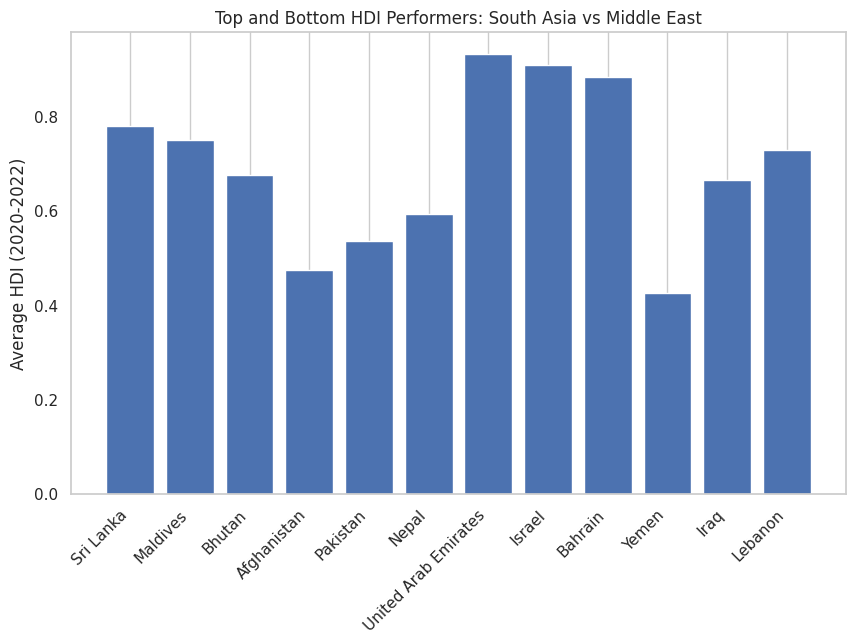

In [90]:



# 1️ Load full HDI dataset


# Identifying the top 3 and bottom 3 countries in each region based on HDI.

southasia_hdi_avg = south_asia_df.groupby("country")["hdi"].mean().reset_index()
middleeast_hdi_avg = middle_east_df.groupby("country")["hdi"].mean().reset_index()


southasia_top3_countries = southasia_hdi_avg.sort_values("hdi", ascending=False).head(3)
southasia_bottom3_countries = southasia_hdi_avg.sort_values("hdi").head(3)
print("Top 3 performers for South Asia:")
print(southasia_top3_countries)
print("Bottom 3 performers for South Asia:")
print(southasia_bottom3_countries)

middleeast_top3_countries = middleeast_hdi_avg.sort_values("hdi", ascending=False).head(3)
middleeast_bottom3_countries = middleeast_hdi_avg.sort_values("hdi" ).head(3)

print("Top 3 performers for Middle East:")
print(middleeast_top3_countries)

print("Bottom 3 peformers for Middle East:")
print(middleeast_bottom3_countries)

# Combine for plotting
top_bottom_df = pd.concat([
    southasia_top3_countries.assign(Region="South Asia"),
    southasia_bottom3_countries.assign(Region="South Asia"),
    middleeast_top3_countries.assign(Region="Middle East"),
    middleeast_bottom3_countries.assign(Region="Middle East")
])


# 6️ Bar chart comparing top and bottom performers

plt.figure(figsize=(10,6))
plt.bar(top_bottom_df["country"], top_bottom_df["hdi"])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average HDI (2020-2022)")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.grid(axis="y")

plt.show()

4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.

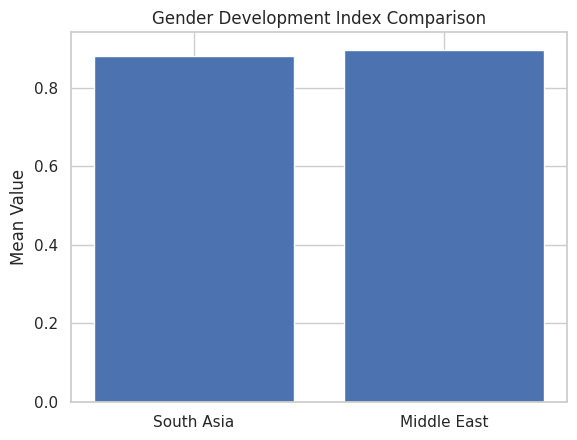

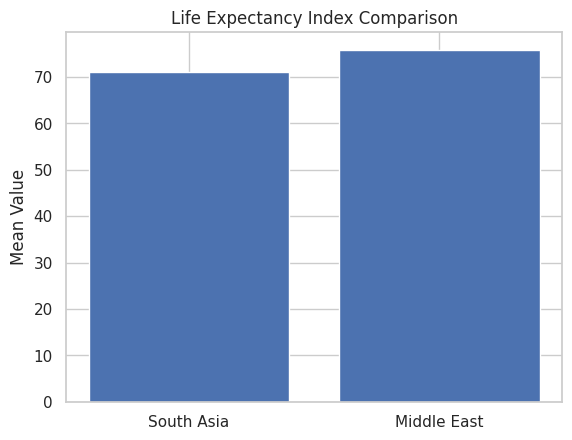

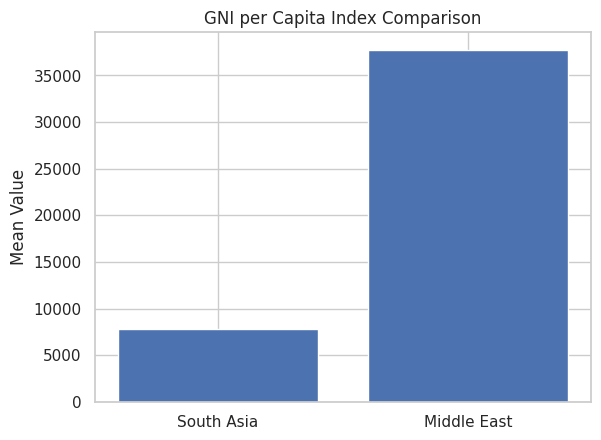

Gender Development Index difference: 0.01508712121212119
Life Expectancy Index difference: 4.885371212121214
GNI per Capita Index difference: 29984.260588178036
Metric with greatest disparity between regions: GNI per Capita Index


In [91]:
# Grouped Bar chart
import matplotlib.pyplot as plt

southasia_gender = south_asia_df["gender_development"].mean()
middleeast_gender = middle_east_df["gender_development"].mean()

southasia_life = south_asia_df["life_expectancy"].mean()
middleeast_life = middle_east_df["life_expectancy"].mean()

southasia_gni = south_asia_df["gross_inc_percap"].mean()
middleeast_gni = middle_east_df["gross_inc_percap"].mean()

# Gender Development Index
regions = ["South Asia", "Middle East"]
values = [southasia_gender, middleeast_gender]
plt.bar(regions, values)
plt.title("Gender Development Index Comparison")
plt.ylabel("Mean Value")
plt.show()

# Life Expectancy Index
regions = ["South Asia", "Middle East"]
values = [southasia_life, middleeast_life]

plt.bar(regions, values)
plt.title("Life Expectancy Index Comparison")
plt.ylabel("Mean Value")
plt.show()

# GNI per Capita Index
regions = ["South Asia", "Middle East"]
values = [southasia_gni, middleeast_gni]

plt.bar(regions, values)
plt.title("GNI per Capita Index Comparison")
plt.ylabel("Mean Value")
plt.show()
# checking the greatest disparity between regions
gender_difference = abs(middleeast_gender - southasia_gender)
life_difference = abs(middleeast_life - southasia_life)
gni_difference = abs(middleeast_gni - southasia_gni)

print("Gender Development Index difference:", gender_difference)
print("Life Expectancy Index difference:", life_difference)
print("GNI per Capita Index difference:", gni_difference)
disparities = {
    "Gender Development Index": gender_difference,
    "Life Expectancy Index": life_difference,
    "GNI per Capita Index": gni_difference
}

max_disparity = max(disparities, key=disparities.get)
print("Metric with greatest disparity between regions:", max_disparity)


5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.

• Identify which region exhibits more variation in HDI.

In [92]:
# HDI range
southasia_hdi_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()
middleeast_hdi_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

print("HDI Range for South Asia:", southasia_hdi_range)
print("HDI Range for Middle East:", middleeast_hdi_range)

# Mean and standard deviation of HDI
mean_south_asia = south_asia_df["hdi"].mean()
std_south_asia = south_asia_df["hdi"].std()

mean_middle_east = middle_east_df["hdi"].mean()
std_middle_east = middle_east_df["hdi"].std()

# Coefficient of variation
southasia_cv = std_south_asia / mean_south_asia
middleeast_cv = std_middle_east / mean_middle_east

print("Coefficient of Variation for South Asia:", southasia_cv)
print("Coefficient of Variation for Middle East:", middleeast_cv)


HDI Range for South Asia: 0.321
HDI Range for Middle East: 0.5130000000000001
Coefficient of Variation for South Asia: 0.1536520924690084
Coefficient of Variation for Middle East: 0.17910145193048382


6. Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.

In [93]:

# South Asia correlations

southasia_correlation_gender = south_asia_df["hdi"].corr(
    south_asia_df["gender_development"]
)
southasia_correlation_life = south_asia_df["hdi"].corr(
    south_asia_df["life_expectancy"]
)

print("South Asia Correlations:")
print("HDI vs Gender Development Index:", round(southasia_correlation_gender, 4))
print("HDI vs Life Expectancy:", round(southasia_correlation_life, 4))



# Middle East correlations

middleeast_correlation_gender = middle_east_df["hdi"].corr(
    middle_east_df["gender_development"]
)
middleeast_correlation_life = middle_east_df["hdi"].corr(
    middle_east_df["life_expectancy"]
)

print("\nMiddle East Correlations:")
print("HDI vs Gender Development Index:", round(middleeast_correlation_gender, 4))
print("HDI vs Life Expectancy:", round(middleeast_correlation_life, 4))


South Asia Correlations:
HDI vs Gender Development Index: 0.8742
HDI vs Life Expectancy: 0.9388

Middle East Correlations:
HDI vs Gender Development Index: 0.9357
HDI vs Life Expectancy: 0.9331


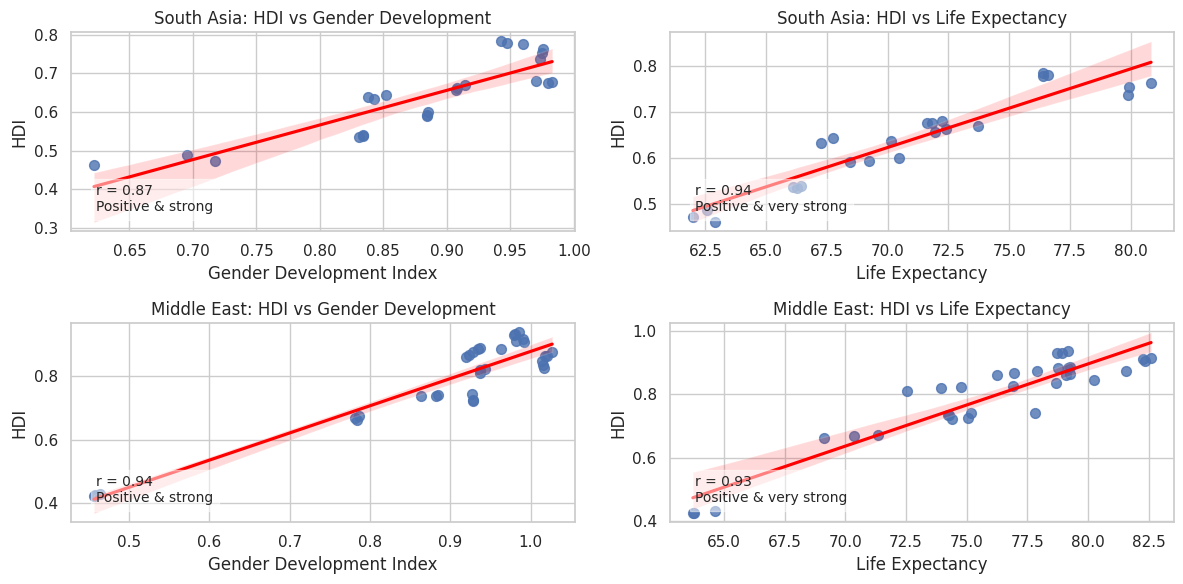

In [94]:

plt.figure(figsize=(12,6))


# South Asia: HDI vs Gender Development
plt.subplot(2,2,1)
sns.regplot(data=south_asia_df, x='gender_development', y='hdi',
            scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('South Asia: HDI vs Gender Development')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.text(0.05, 0.1, f"r = {southasia_correlation_gender:.2f}\nPositive & strong",
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


# South Asia: HDI vs Life Expectancy
plt.subplot(2,2,2)
sns.regplot(data=south_asia_df, x='life_expectancy', y='hdi',
            scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('South Asia: HDI vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.text(0.05, 0.1, f"r = {southasia_correlation_life:.2f}\nPositive & very strong",
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


# Middle East: HDI vs Gender Development
plt.subplot(2,2,3)
sns.regplot(data=middle_east_df, x='gender_development', y='hdi',
            scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Middle East: HDI vs Gender Development')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.text(0.05, 0.1, f"r = {middleeast_correlation_gender:.2f}\nPositive & strong",
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


# Middle East: HDI vs Life Expectancy
plt.subplot(2,2,4)
sns.regplot(data=middle_east_df, x='life_expectancy', y='hdi',
            scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Middle East: HDI vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.text(0.05, 0.1, f"r = {middleeast_correlation_life:.2f}\nPositive & very strong",
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


7. Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.

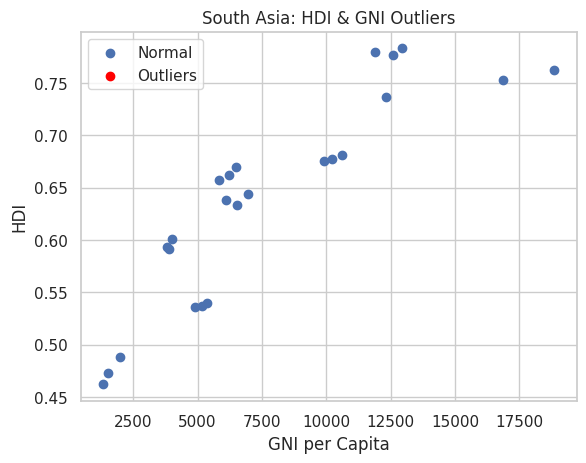

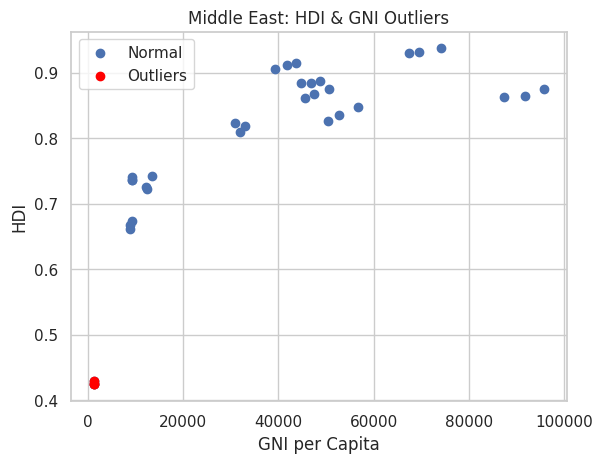

In [95]:
# Outlier Detection
# South Asia
Q1_sa = south_asia_df["hdi"].quantile(0.25)
Q3_sa = south_asia_df["hdi"].quantile(0.75)
IQR_sa = Q3_sa - Q1_sa
outliers_sa = south_asia_df[(south_asia_df["hdi"] < Q1_sa - 1.5*IQR_sa) | (south_asia_df["hdi"] > Q3_sa + 1.5*IQR_sa)]

plt.scatter(south_asia_df["gross_inc_percap"], south_asia_df["hdi"], label="Normal")
plt.scatter(outliers_sa["gross_inc_percap"], outliers_sa["hdi"], color="red", label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI & GNI Outliers")
plt.legend()
plt.show()
# Outlier detection
# Middle east
Q1_me = middle_east_df["hdi"].quantile(0.25)
Q3_me = middle_east_df["hdi"].quantile(0.75)
IQR_me = Q3_me - Q1_me

outliers_me = middle_east_df[(middle_east_df["hdi"] < Q1_me - 1.5*IQR_me) |(middle_east_df["hdi"] > Q3_me + 1.5*IQR_me)]

plt.scatter(middle_east_df["gross_inc_percap"], middle_east_df["hdi"], label="Normal")
plt.scatter(outliers_me["gross_inc_percap"], outliers_me["hdi"], color="red", label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI & GNI Outliers")
plt.legend()
plt.show()